# This project is to find out how to segment a market and develop a targeting strategy using RFM analysis

In [1]:
import pandas as pd

In [61]:
import matplotlib.pyplot as plt


In [3]:
import seaborn as sns

In [44]:
data_df = pd.read_csv('/content/TuscanDataForRFMAnalysis.csv')

In [45]:
data_df.head()

,Unnamed: 0,numords,totdol,last,buyer,buyerdummy,dollars
0,1,7,493,207,no,0,0
1,2,4,423,625,no,0,0
2,3,4,246,28,no,0,0
3,4,3,271,778,no,0,0
4,5,2,148,396,no,0,0


In [6]:
data_df.shape

(96551, 7)

In [46]:
data_df['buyerdummy'] = pd.to_numeric(data_df['buyerdummy'], errors='coerce')
data_df['dollars'] = pd.to_numeric(data_df['dollars'], errors='coerce')
data_df['last'] = pd.to_numeric(data_df['last'], errors='coerce')
data_df['numords'] = pd.to_numeric(data_df['numords'], errors='coerce')
data_df['totdol'] = pd.to_numeric(data_df['totdol'], errors='coerce')

**What percentage of customers bought from the test catalogue?**


In [47]:
purchase_df= data_df[data_df['buyerdummy']==1]

In [48]:
purchase_df.head()

,Unnamed: 0,numords,totdol,last,buyer,buyerdummy,dollars
94180,102,1,15,95,yes,1,20
94181,104,8,556,309,yes,1,86
94182,260,7,606,4,yes,1,70
94183,279,2,98,57,yes,1,140
94184,284,2,173,4,yes,1,136


In [49]:
purchase_df.shape

(2371, 7)

In [50]:
percentage_purchase = (purchase_df.shape[0]/data_df.shape[0])*100


In [90]:
print(f"percentage_purchase: {percenatge_purchase:.1f}")

percentage_purchase: 2.5


In [24]:
summary_stats = purchase_df['dollars'].describe()

In [25]:
print(summary_stats)

count    2371.000000
mean      104.242935
std       157.000865
min         5.000000
25%        40.000000
50%        75.000000
75%       130.000000
max      6249.000000
Name: dollars, dtype: float64


Create the quintiles for Recency (R), Frequency (F), and Monetary Value (M). Show 5 observations with their R, F, and M values and quintiles

In [92]:
data_df['R_quintile'] = pd.qcut(data_df['last'], 5, labels=[1,2,3,4,5], duplicates='drop')
data_df['F_quintile'] = pd.qcut(data_df['numords'], 5, labels=[1, 2, 3, 4], duplicates='drop')
data_df['M_quintile'] = pd.qcut(data_df['totdol'], 5, labels=[1, 2, 3, 4, 5],duplicates='drop')
data_df[['last', 'numords', 'totdol', 'R_quintile', 'F_quintile', 'M_quintile']].head(5)

,last,numords,totdol,R_quintile,F_quintile,M_quintile
0,207,7,493,2,4,5
1,625,4,423,4,3,4
2,28,4,246,1,3,4
3,778,3,271,5,2,4
4,396,2,148,3,1,3


 the averages of R, F, and M for each quintile in a bar chart

In [85]:
avg_recency = data_df.groupby('R_quintile')['last'].mean()
avg_frequency = data_df.groupby('F_quintile')['numords'].mean()
avg_monetary = data_df.groupby('M_quintile')['totdol'].mean()

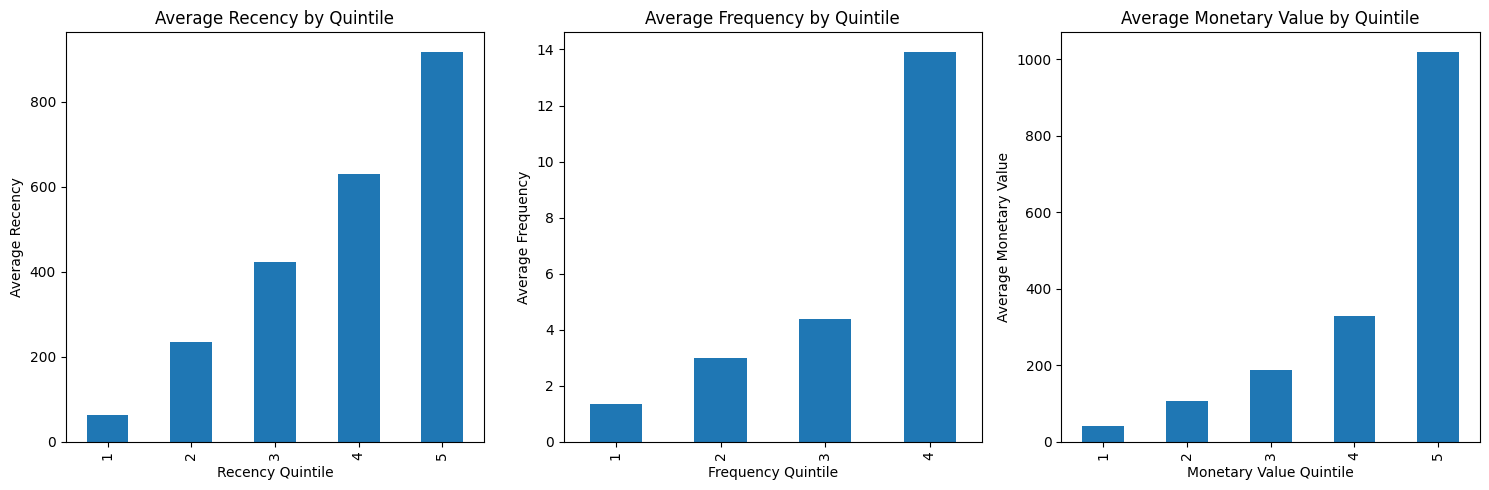

In [86]:
plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 1)
avg_recency.plot(kind='bar')
plt.title('Average Recency by Quintile')
plt.xlabel('Recency Quintile')
plt.ylabel('Average Recency')

plt.subplot(1, 3, 2)
avg_frequency.plot(kind='bar')
plt.title('Average Frequency by Quintile')
plt.xlabel('Frequency Quintile')
plt.ylabel('Average Frequency')

plt.subplot(1, 3, 3)
avg_monetary.plot(kind='bar')
plt.title('Average Monetary Value by Quintile')
plt.xlabel('Monetary Value Quintile')
plt.ylabel('Average Monetary Value')

plt.tight_layout()
plt.show()

response probability varies by R, F, and M quintiles

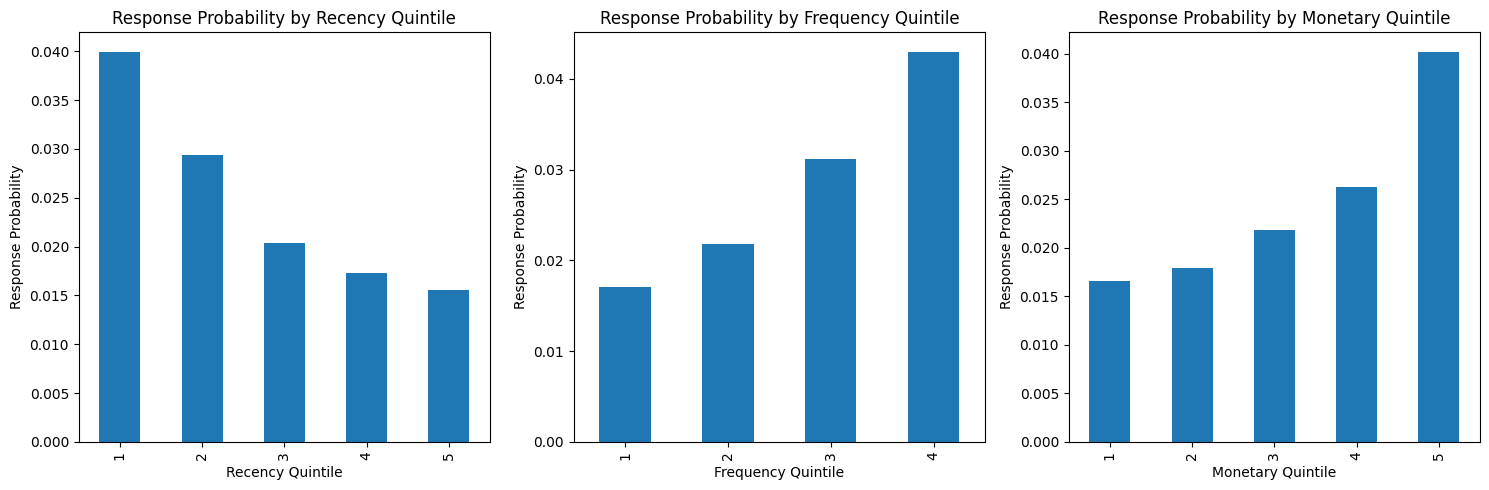

In [87]:
# Calculate response probability by quintiles
response_by_r = data_df.groupby('R_quintile')['buyerdummy'].mean()
response_by_f = data_df.groupby('F_quintile')['buyerdummy'].mean()
response_by_m = data_df.groupby('M_quintile')['buyerdummy'].mean()

# Plotting response probabilities
plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 1)
response_by_r.plot(kind='bar')
plt.title('Response Probability by Recency Quintile')
plt.xlabel('Recency Quintile')
plt.ylabel('Response Probability')

plt.subplot(1, 3, 2)
response_by_f.plot(kind='bar')
plt.title('Response Probability by Frequency Quintile')
plt.xlabel('Frequency Quintile')
plt.ylabel('Response Probability')

plt.subplot(1, 3, 3)
response_by_m.plot(kind='bar')
plt.title('Response Probability by Monetary Quintile')
plt.xlabel('Monetary Quintile')
plt.ylabel('Response Probability')

plt.tight_layout()
plt.show()


**RFM Score**

In [172]:
data_df['R_quintile'] = pd.qcut(data_df['last'], 5, labels=[1,2,3,4,5], duplicates='drop')
data_df['F_quintile'] = pd.qcut(data_df['numords'], 5, labels=[1, 2, 3, 4], duplicates='drop')
data_df['M_quintile'] = pd.qcut(data_df['totdol'], 5, labels=[1, 2, 3, 4, 5],duplicates='drop')
data_df['RFM_Score'] = data_df['R_quintile'].astype(str) + data_df['F_quintile'].astype(str) + data_df['M_quintile'].astype(str)
rfm_score = data_df.groupby('RFM_Score').agg(
   mean_buyers =('buyerdummy', 'mean'),
    number_of_buyers=('buyerdummy', 'sum')
).reset_index()

rfm_score = rfm_score.sort_values(by='RFM_Score')

print(rfm_score.head())

  RFM_Score  mean_buyers  number_of_buyers
0       111     0.028072                69
1       112     0.027975                63
2       113     0.025907                45
3       114     0.028153                25
4       115     0.022059                 3


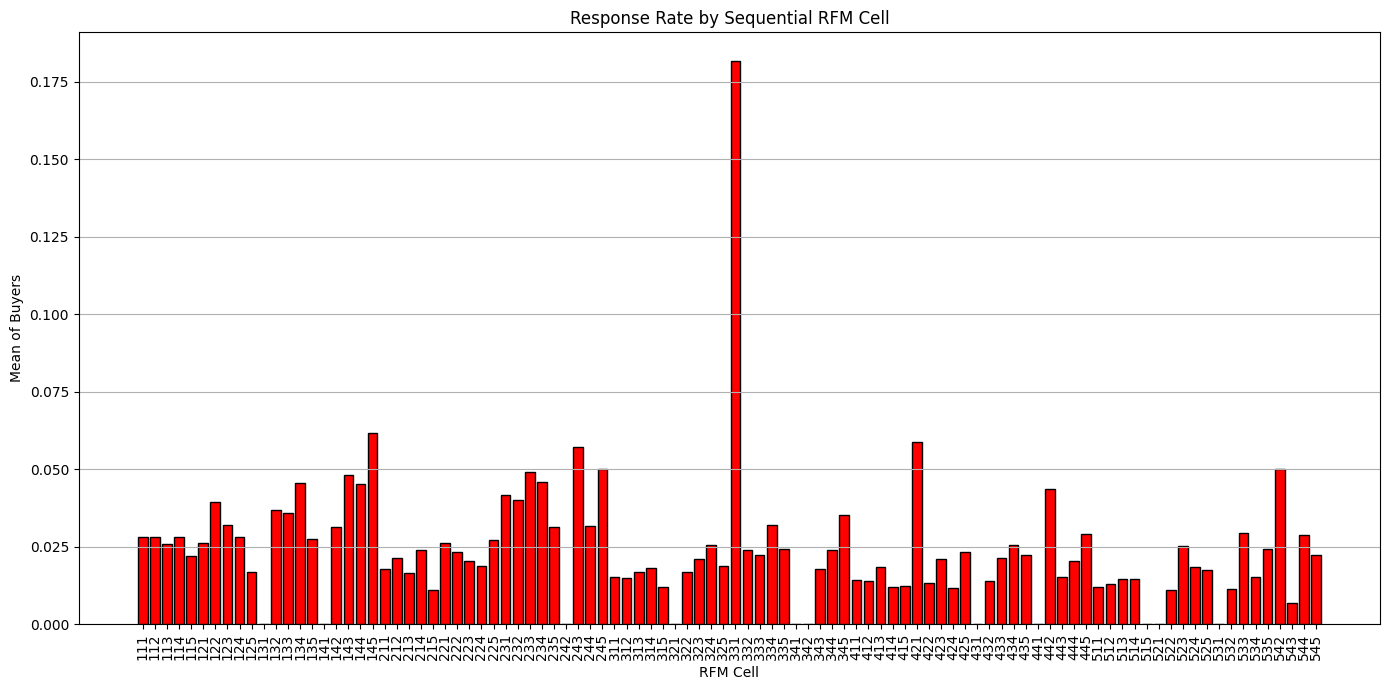

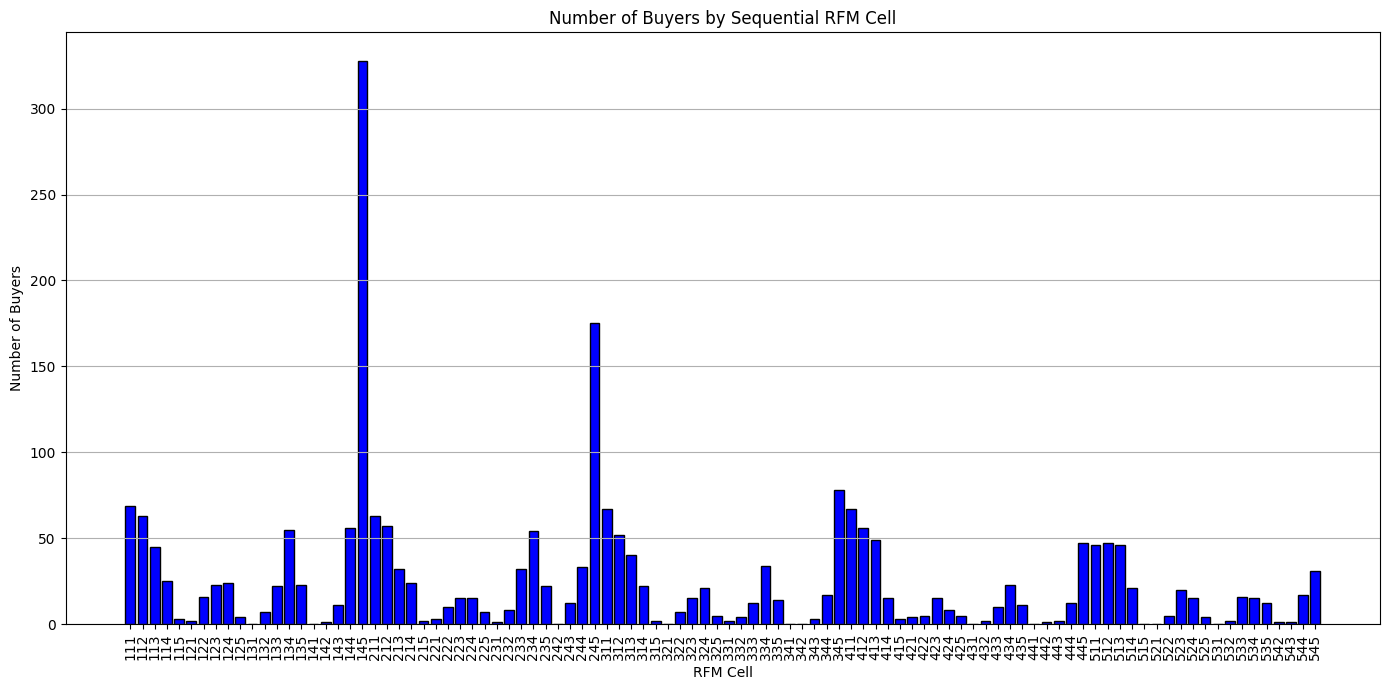

In [175]:
# Plot the response rate by sequential RFM cell
plt.figure(figsize=(14, 7))
plt.bar(rfm_score['RFM_Score'], rfm_score['mean_buyers'], color='red', edgecolor='black')
plt.title('Response Rate by Sequential RFM Cell')
plt.xlabel('RFM Cell')
plt.ylabel('Mean of Buyers')
plt.xticks(rotation=90)
plt.grid(axis='y')

# Adjust layout to make room for xticks
plt.tight_layout()

# Show the plot
plt.show()

# Plot the number of buyers by sequential RFM cell
plt.figure(figsize=(14, 7))
plt.bar(rfm_score['RFM_Score'], rfm_score['number_of_buyers'], color='blue', edgecolor='black')
plt.title('Number of Buyers by Sequential RFM Cell')
plt.xlabel('RFM Cell')
plt.ylabel('Number of Buyers')
plt.xticks(rotation=90)
plt.grid(axis='y')

# Adjust layout to make room for xticks
plt.tight_layout()

# Show the plot
plt.show()

 Calculate the Profitability of a Mass-Marketing Strategy

In [78]:
# Given values
total_customers = 1834469
cost_per_mailing = 1
cost_of_goods_and_services = 0.5  # 50% of revenue
average_revenue_per_customer = purchase_df['dollars'].mean()


In [150]:
print(f"average_revenue_per_customer: {average_revenue_per_customer:.2f}")
print(len(data_df))

average_revenue_per_customer: 104.24
96551


In [147]:
expected_buyers = total_customers*percenatge_purchase/100

# Total revenue and cost
total_revenue = expected_buyers * average_revenue_per_customer
costgs= cost_of_goods_and_services*total_revenue
total_cost = (total_customers * cost_per_mailing) +costgs
net_profit = total_revenue - total_cost

print(f"Expected Buyers: {expected_buyers}")
print(f"Total Revenue: ${total_revenue}")
print(f"Net Profit: ${net_profit}")

Expected Buyers: 45049.0
Total Revenue: $4696040.0
Net Profit: $513551.0


In [165]:
break_even_response_rate = cost_per_mailing / (average_revenue_per_customer - cost_of_goods_and_services * average_revenue_per_customer)*100
print(f"Break-even Response Rate: {break_even_response_rate:.2f}")

Break-even Response Rate: 1.92


In [166]:
break_even = cost_per_mailing / (average_revenue_per_customer - cost_of_goods_and_services * average_revenue_per_customer)
print(break_even)

0.019185952419485355


In [161]:
data_df['R_quintile'] = pd.qcut(data_df['last'], 5, labels=[1,2,3,4,5], duplicates='drop')
data_df['F_quintile'] = pd.qcut(data_df['numords'], 5, labels=[1, 2, 3, 4], duplicates = 'drop')
data_df['M_quintile'] = pd.qcut(data_df['totdol'], 5, labels=[1, 2, 3, 4, 5], duplicates='drop')
data_df['RFM_Score'] = data_df['R_quintile'].astype(str) + data_df['F_quintile'].astype(str) + data_df['M_quintile'].astype(str)

# Calculate the number of customers, number of buyers, and total profitability for each RFM cell
rfm_counts = data_df.groupby('RFM_Score').agg(
    num_customers=('buyerdummy', 'size'),
    num_buyers=('buyerdummy', 'sum'),
    total_profitability=('dollars', 'sum')
).reset_index()

# Sort RFM scores for plotting
rfm_counts = rfm_counts.sort_values(by='RFM_Score')

top_segments = rfm_counts.sort_values(by='total_profitability', ascending=False).head(10)
print("\nTop Customer Segments Based on Total Profitability:")
print(top_segments)



Top Customer Segments Based on Total Profitability:
   RFM_Score  num_customers  num_buyers  total_profitability
19       145           5308         328                40942
38       245           3501         175                18584
58       345           2208          78                 8909
21       212           2689          57                 7021
40       312           3481          52                 6822
39       311           4366          67                 6608
1        112           2252          63                 6186
81       513           3188          46                 5966
59       411           4754          67                 5842
20       211           3518          63                 5806


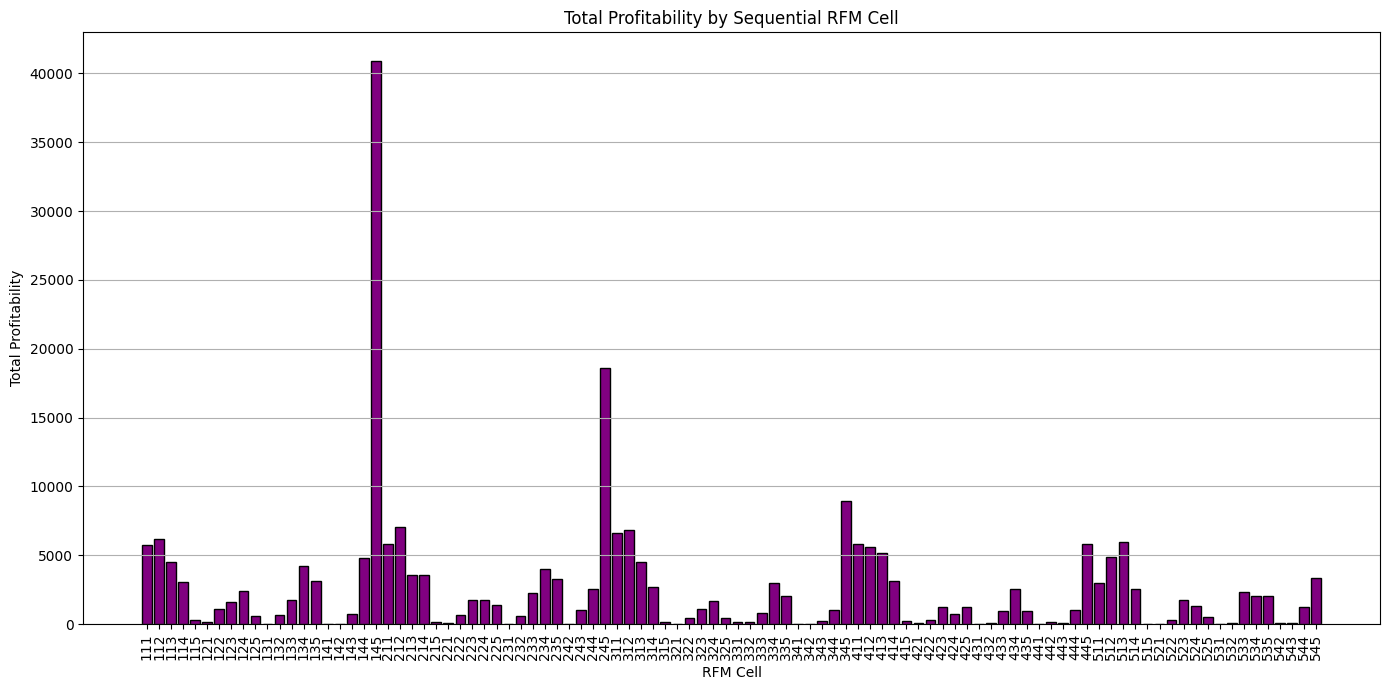

In [169]:
plt.figure(figsize=(14, 7))
plt.bar(rfm_counts['RFM_Score'], rfm_counts['total_profitability'], color='purple', edgecolor='black')
plt.title('Total Profitability by Sequential RFM Cell')
plt.xlabel('RFM Cell')
plt.ylabel('Total Profitability')
plt.xticks(rotation=90)
plt.grid(axis='y')

# # Highlight top customer segments
# for index, row in target_segments.iterrows():
#     plt.text(row['RFM_Score'], row['total_profitability'] + 100, str(row['total_profitability']), ha='center', color='black', fontweight='bold')

# Adjust layout to make room for xticks
plt.tight_layout()

# Show the plot
plt.show()

In [167]:
target_segments = rfm_counts[rfm_counts['num_buyers'] / rfm_counts['num_customers'] >= break_even]
print(rfm_counts['num_buyers'] / rfm_counts['num_customers'])
optimum_fraction = target_segments['num_customers'].sum() / total_customers
expected_response_rate = target_segments['num_buyers'].sum() / target_segments['num_customers'].sum()
expected_profit = target_segments['total_profitability'].sum() - (target_segments['num_customers'].sum() * 1) - (0.5 * target_segments['total_profitability'].sum())
roi_rfm = (expected_profit / (target_segments['num_customers'].sum() * 1)) * 100

print(f"\nOptimum fraction of the market to target: {optimum_fraction:.2f}")
print(f"Expected response rate: {expected_response_rate:.2f}")
print(f"Expected net profit: ${expected_profit:.2f}")
print(f"ROI : {roi_rfm:.2f}%")

0     0.028072
1     0.027975
2     0.025907
3     0.028153
4     0.022059
        ...   
93    0.024096
94    0.050000
95    0.006757
96    0.028668
97    0.022238
Length: 98, dtype: float64

Optimum fraction of the market to target: 0.03
Expected response rate: 0.03
Expected net profit: $38163.50
ROI of marketing expenditure: 80.07%


In [83]:
# Using the RFM approach to calculate optimal targeting
# Filter customers who meet the break-even response rate criteria
profitable_customers = data_df[data_df['buyerdummy'] > break_even]

# Calculate the optimal fraction of the market to target
optimal_fraction = len(profitable_customers) / total_customers

# Expected response rate, net profit, and ROI
expected_response_rate = profitable_customers['buyerdummy'].mean()
net_profit_rfm = (expected_response_rate * total_customers * average_revenue_per_customer) - (optimal_fraction * total_customers * cost_per_mailing)
roi_rfm = net_profit_rfm / (optimal_fraction * total_customers * cost_per_mailing)

print(f"Optimal Fraction to Target: {optimal_fraction:.2%}")
print(f"Expected Response Rate: {expected_response_rate:.2%}")
print(f"Net Profit using RFM: ${net_profit_rfm:.2f}")
print(f"ROI using RFM: {roi_rfm:.2%}")


Optimal Fraction to Target: 0.13%
Expected Response Rate: 100.00%
Net Profit using RFM: $191228062.59
ROI using RFM: 8065291.55%


The RFM approach yields more profit and ROI than the mass-marketing approach because it targets customers who are more likely to respond positively, thus reducing the cost of mailing to uninterested customers and increasing the efficiency of marketing spend.
